In [1]:
!pip install librosa

     |████████████████████████████████| 214 kB 638 kB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 47 kB/s eta 0:00:012
     |████████████████████████████████| 377 kB 124 kB/s eta 0:00:01
     |████████████████████████████████| 56 kB 218 kB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 101 kB/s eta 0:00:01
     |████████████████████████████████| 23.1 MB 321 kB/s eta 0:00:01
     |████████████████████████████████| 952 kB 273 kB/s eta 0:00:01
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23706 sha256=13c6508679a4e56d6a60754291c34e6149ece441102c93ddbe25b72711913c7a
  Stored in directory: /Users/prasantpoudel/Library/Caches/pip/wheels/e4/76/a4/cfb55573167a1f5bde7d7a348e95e509c64b2c3e8f921932c3
Successfully built audioread
  Attempting uninstall: setuptools
    Found existing installation: setuptools 61.2.0
    Uninstalling setuptools-61.2.0:
      Successfully uninstalled setuptools-61.2.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename='4201-3-0-0.wav'


In [5]:
import IPython.display as ipd
import librosa
import librosa.display
#librosa create only single channel audio

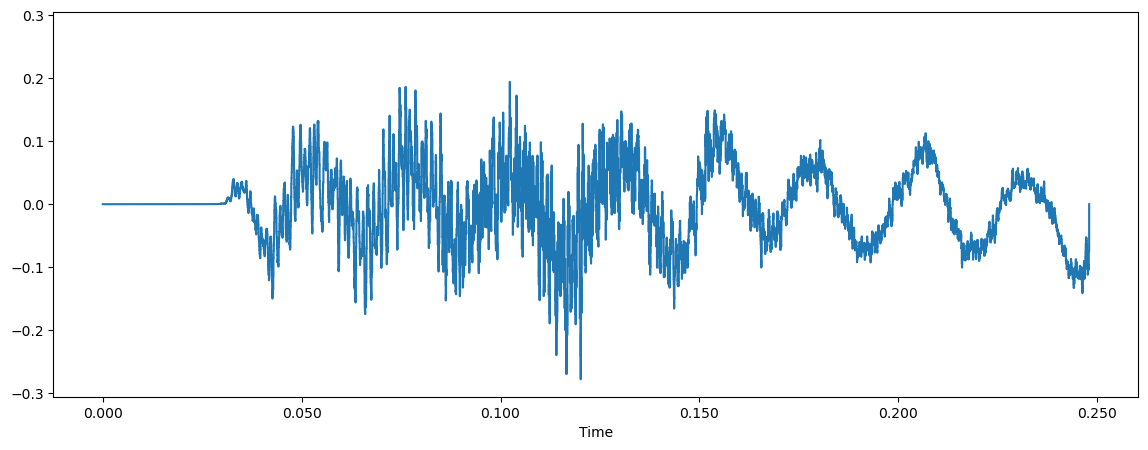

In [6]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)


In [7]:
sample_rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [9]:
wave_sample_rate


44100

In [10]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-2357, -2032],
       [-2327, -2161],
       [-2596, -2295]], dtype=int16)

In [11]:
data


array([ 0.        ,  0.        ,  0.        , ..., -0.07422104,
       -0.07476886,  0.        ], dtype=float32)

In [12]:
import pandas as pd
metadata=pd.read_csv('archive/UrbanSound8K.csv')
metadata.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
## check wheather the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## two channel wave file


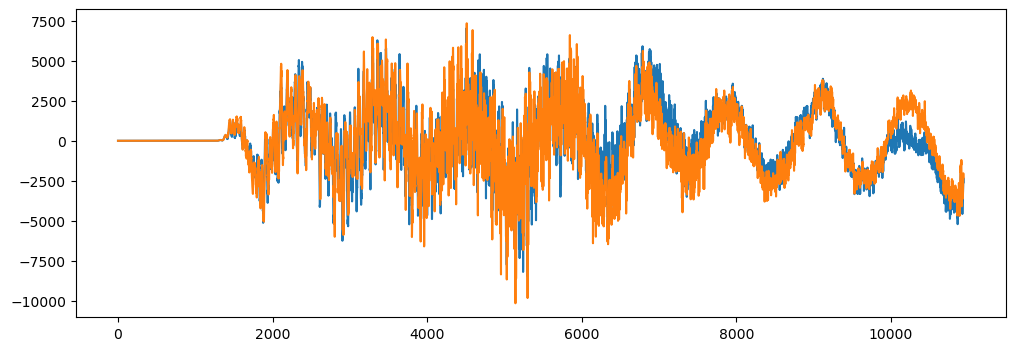

In [14]:

audio_file_path='4201-3-0-0.wav'
wave_sample_rate, wave_audio = wav.read(audio_file_path) 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [15]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-2357, -2032],
       [-2327, -2161],
       [-2596, -2295]], dtype=int16)

# Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [18]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 11)


In [19]:
mfccs

array([[-5.56480103e+02, -2.95507996e+02, -1.92648575e+02,
        -1.55511490e+02, -1.42366516e+02, -1.45936020e+02,
        -1.63939255e+02, -1.92689423e+02, -2.20544800e+02,
        -2.35985657e+02, -2.31931747e+02],
       [ 1.26617424e+02,  1.38515320e+02,  1.28916061e+02,
         1.07874222e+02,  9.27007828e+01,  9.54957199e+01,
         9.67420349e+01,  9.32235794e+01,  8.64103928e+01,
         8.63756561e+01,  9.17973022e+01],
       [ 2.33482399e+01,  7.90970898e+00, -5.21126556e+00,
        -1.83084869e+01, -1.83228378e+01, -5.56645775e+00,
        -3.02287531e+00,  1.72768474e-01, -2.48637843e+00,
         4.01428223e+00,  8.29508400e+00],
       [-2.91604972e+00, -1.95219755e+00,  1.34532952e+00,
         9.84928894e+00,  1.57724867e+01,  1.63033409e+01,
         1.69239368e+01,  1.83404026e+01,  2.23266087e+01,
         2.03178291e+01,  1.30614290e+01],
       [-8.26960564e+00, -2.20420437e+01, -2.60463791e+01,
        -3.59826126e+01, -5.10218582e+01, -5.97030029e+01,
  

In [20]:
audio_dataset_path='archive'
metadata=pd.read_csv('archive/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [21]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [22]:
import os

In [23]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [04:39, 12.51it/s]/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [10:51, 18.51it/s]/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [11:21, 12.81it/s]


In [24]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [25]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [26]:
X.shape

(8732, 40)

In [32]:
y.shape

(8732, 10)

In [33]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [35]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# model creation

In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [38]:
#number of classes
num_labels=y.shape[1]

In [40]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

Metal device set to: Apple M1


2022-09-03 22:21:14.311290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-03 22:21:14.311711: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [42]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [43]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


2022-09-03 22:22:12.068054: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-03 22:22:12.438957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - ETA: 0s - loss: 8.8874 - accuracy: 0.1742

2022-09-03 22:22:16.817989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 2.19415, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 5s 16ms/step - loss: 8.8874 - accuracy: 0.1742 - val_loss: 2.1942 - val_accuracy: 0.2124
Epoch 2/100
215/219 [============================>.] - ETA: 0s - loss: 2.4700 - accuracy: 0.1988
Epoch 2: val_loss improved from 2.19415 to 2.17926, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 3s 13ms/step - loss: 2.4675 - accuracy: 0.1983 - val_loss: 2.1793 - val_accuracy: 0.2147
Epoch 3/100
217/219 [============================>.] - ETA: 0s - loss: 2.1611 - accuracy: 0.2428
Epoch 3: val_loss improved from 2.17926 to 2.13574, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 3s 13ms/step - loss: 2.1624 - accuracy: 0.2425 - val_loss: 2.1357 - val_accuracy: 0.2227
Epoch 4/100
216/219 [============================>.] - ETA: 0s - loss: 2.0536 - accuracy: 0.

Epoch 26/100
216/219 [============================>.] - ETA: 0s - loss: 1.1839 - accuracy: 0.5867
Epoch 26: val_loss improved from 1.25633 to 1.20612, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 3s 13ms/step - loss: 1.1841 - accuracy: 0.5871 - val_loss: 1.2061 - val_accuracy: 0.6188
Epoch 27/100
215/219 [============================>.] - ETA: 0s - loss: 1.1671 - accuracy: 0.6064
Epoch 27: val_loss did not improve from 1.20612
219/219 [==============================] - 3s 13ms/step - loss: 1.1689 - accuracy: 0.6054 - val_loss: 1.2150 - val_accuracy: 0.6148
Epoch 28/100
217/219 [============================>.] - ETA: 0s - loss: 1.1302 - accuracy: 0.6099
Epoch 28: val_loss improved from 1.20612 to 1.19298, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 3s 13ms/step - loss: 1.1306 - accuracy: 0.6094 - val_loss: 1.1930 - val_accuracy: 0.6342
Epoch 29/100
216/219 [========================

216/219 [============================>.] - ETA: 0s - loss: 0.8079 - accuracy: 0.7238
Epoch 52: val_loss improved from 0.87384 to 0.86461, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 3s 13ms/step - loss: 0.8098 - accuracy: 0.7236 - val_loss: 0.8646 - val_accuracy: 0.7189
Epoch 53/100
216/219 [============================>.] - ETA: 0s - loss: 0.8357 - accuracy: 0.7190
Epoch 53: val_loss improved from 0.86461 to 0.84463, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 3s 13ms/step - loss: 0.8344 - accuracy: 0.7188 - val_loss: 0.8446 - val_accuracy: 0.7396
Epoch 54/100
216/219 [============================>.] - ETA: 0s - loss: 0.7883 - accuracy: 0.7321
Epoch 54: val_loss did not improve from 0.84463
219/219 [==============================] - 3s 13ms/step - loss: 0.7864 - accuracy: 0.7329 - val_loss: 0.8508 - val_accuracy: 0.7189
Epoch 55/100
216/219 [============================>.] - ETA

219/219 [==============================] - 3s 13ms/step - loss: 0.6843 - accuracy: 0.7735 - val_loss: 0.7001 - val_accuracy: 0.7762
Epoch 79/100
218/219 [============================>.] - ETA: 0s - loss: 0.6802 - accuracy: 0.7765
Epoch 79: val_loss did not improve from 0.70009
219/219 [==============================] - 3s 13ms/step - loss: 0.6800 - accuracy: 0.7767 - val_loss: 0.7176 - val_accuracy: 0.7705
Epoch 80/100
216/219 [============================>.] - ETA: 0s - loss: 0.6883 - accuracy: 0.7675
Epoch 80: val_loss did not improve from 0.70009
219/219 [==============================] - 3s 12ms/step - loss: 0.6898 - accuracy: 0.7669 - val_loss: 0.7177 - val_accuracy: 0.7659
Epoch 81/100
215/219 [============================>.] - ETA: 0s - loss: 0.6672 - accuracy: 0.7719
Epoch 81: val_loss did not improve from 0.70009
219/219 [==============================] - 3s 13ms/step - loss: 0.6698 - accuracy: 0.7708 - val_loss: 0.7283 - val_accuracy: 0.7642
Epoch 82/100
218/219 [============

In [44]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7904979586601257


In [49]:
filename="archive/fold10/2937-1-0-0.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

1/1 [==============================] - 0s 13ms/step


array([[1.9311962e-04, 5.0394273e-01, 1.2448579e-02, 5.1242977e-02,
        1.1996883e-02, 2.3272915e-02, 1.9402978e-03, 1.3893741e-03,
        1.2648310e-02, 3.8092485e-01]], dtype=float32)